# Topic modelling with Transformers

Topic modelling is a task to extract implicit topics from a collection of texts.


LLMS encoders are good in representing texts. It is possible to use transformers models (e.g. BERT) for topic modelling.

During this lesson:
* Undertstand how to use transformer models for topic modelling.
* Will get familiar with a BERTopic library for out of the box topic modelling.
* Will analyse and visualise topics for a moview reviews dataset.


In [ ]:
!pip install transformers==4.31.0 datasets==2.14.4 bertopic==0.15.0 Pillow==10.0.0

In [ ]:
import datasets
from bertopic import BERTopic
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

pd.set_option("display.max_colwidth", 500)

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## 1. What is a topic modelling?

It is an unsupervised approach to extract latent topics from a collection of text documents. There is a lot of algorithms for topic modellings. It is also possible to utilise transformers for topic modelling.

## 2. Topic modelling with BERTopic

BERTopic is a library for topic modelling with transformers models.
Read more https://maartengr.github.io/BERTopic/index.html

How to apply BERT for given task?

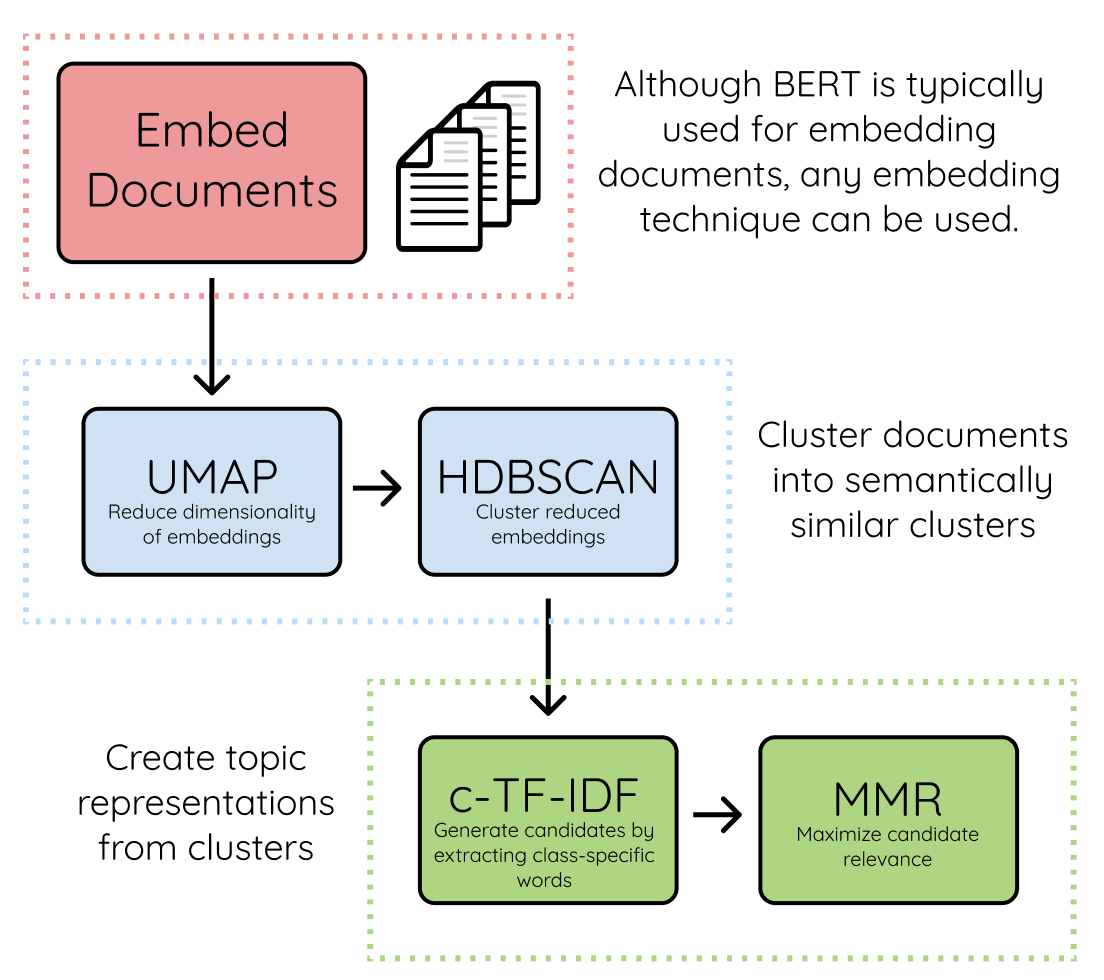

In [ ]:
Image.open("/content/drive/MyDrive/oxford_llms_practice/day_1/images/bertopic.png")

# thanks for the great illustration https://towardsdatascience.com/meet-bertopic-berts-cousin-for-advanced-topic-modeling-ea5bf0b7faa3

We will use a movie reviews dataset from Rotten Tomatoes - a US popular platform about movies. Each sample has a text and a label expressing its sentiment.

Read details of the dataset https://huggingface.co/datasets/rotten_tomatoes

In [ ]:
data = datasets.load_dataset("rotten_tomatoes", split="train")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [ ]:
data = data.to_pandas()

In [ ]:
data = data.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
docs = data["text"].tolist()
labels = data["label"].tolist()

## 3. Our first topic model

In [ ]:
topic_model = BERTopic()  # create an instance of topic model

BERTtopic model takes as input texts, vectorizes them with a prettrained transformer model, analyses in an unsupervised manner patterns in texts and generates topics for each text.

In [ ]:
topics, probs = topic_model.fit_transform(docs)

-1 means topic is unknown for given texts. We may also see that a representation of other topics looks not good. Model overfitted to the most common words that do not make much sense.

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,296,-1_the_of_and_to,"[the, of, and, to, as, its, is, in, it, but]","[the inhospitability of the land emphasizes the spare precision of the narratives and helps to give them an atavistic power , as if they were tales that had been handed down since the beginning of time ., it's one of those baseball pictures where the hero is stoic , the wife is patient , the kids are as cute as all get-out and the odds against success are long enough to intimidate , but short enough to make a dream seem possible ., for those who are intrigued by politics of the '70s , the fi..."
1,0,541,0_the_and_of_to,"[the, and, of, to, is, that, film, it, in, movie]","[the furious coherence that [deniro] brings to this part only underscores the fuzzy sentimentality of the movie itself , which feels , as it plods toward the end , less like a movie than like the filmed reading of a script in need of polishing ., while somewhat less than it might have been , the film is a good one , and you've got to hand it to director george clooney for biting off such a big job the first time out ., lacks the inspiration of the original and has a bloated plot that stretch..."
2,1,52,1_comedy_and_of_the,"[comedy, and, of, the, on, laughs, funny, in, romantic, it]","[a broadly played , lowbrow comedy in which the cast delivers mildly amusing performances and no farm animals were injured by any of the gags ., the powers team has fashioned a comedy with more laughs than many , no question . but this time there's some mold on the gold ., a culture-clash comedy that , in addition to being very funny , captures some of the discomfort and embarrassment of being a bumbling american in europe .]"
3,2,37,2_that_from_clunker_and,"[that, from, clunker, and, romp, you, the, its, like, more]","[like a grinning jack o' lantern , its apparent glee is derived from a lobotomy , having had all its vital essence scooped out and discarded ., in xxx , diesel is that rare creature -- an action hero with table manners , and one who proves that elegance is more than tattoo deep ., every nanosecond of the the new guy reminds you that you could be doing something else far more pleasurable . something like scrubbing the toilet . or emptying rat traps . or doing last year's taxes with your ex-wi..."
4,3,34,3_of_the_and_in,"[of, the, and, in, to, that, about, are, story, drama]","[a tender and touching drama , based on the true story of a troubled african-american's quest to come to terms with his origins , reveals the yearning we all have in our hearts for acceptance within the family circle ., cut through the layers of soap-opera emotion and you find a scathing portrayal of a powerful entity strangling the life out of the people who want to believe in it the most ., the problems of the people in love in the time of money are hardly specific to their era . they just..."
5,4,22,4_and_of_in_art,"[and, of, in, art, hiphop, its, the, artists, work, is]","[immersing us in the endlessly inventive , fiercely competitive world of hip-hop djs , the project is sensational and revelatory , even if scratching makes you itch ., the message of such reflections--intentional or not--is that while no art grows from a vacuum , many artists exist in one ., this is as powerful a set of evidence as you'll ever find of why art matters , and how it can resonate far beyond museum walls and through to the most painfully marginal lives .]"
6,5,18,5_its_clever_just_it,"[its, clever, just, it, is, idea, whats, but, too, right]","[much of what we see is horrible but it's also undeniably exceedingly clever ., while american adobo has its heart ( and its palate ) in the right place , its brain is a little scattered -- ditsy , even ., what's infuriating about full frontal is that it's too close to real life to make sense . what's invigorating about it is that it doesn't give a damn .]"


In order to reduce that noise it is possible to filter out common words with a predefined vectorizer. Let's pass CountVectorizer with english stop words and fit our model again.

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

In [ ]:
topics, probs = topic_model.fit_transform(docs)

Much better! The representation of each topic now has meaningful words.

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,312,-1_film_like_way_comedy,"[film, like, way, comedy, theres, war, little, story, movie, exercise]","[anyway , for one reason or another , crush turns into a dire drama partway through . after that , it just gets stupid and maudlin . too bad , but thanks to some lovely comedic moments and several fine performances , it's not a total loss ., some of the most ravaging , gut-wrenching , frightening war scenes since "" saving private ryan "" have been recreated by john woo in this little-known story of native americans and their role in the second great war ., there are moments of real pleasure t..."
1,0,550,0_film_movie_like_time,"[film, movie, like, time, director, films, just, good, characters, story]","[you wonder why enough wasn't just a music video rather than a full-length movie ., first-time writer-director serry shows a remarkable gift for storytelling with this moving , effective little film ., a different movie -- sometimes tedious -- by a director many viewers would like to skip but film buffs should get to know .]"
2,1,49,1_comedy_laughs_romantic_funny,"[comedy, laughs, romantic, funny, hilarious, romance, humor, makes, look, wise]","[a romantic comedy enriched by a sharp eye for manners and mores ., the powers team has fashioned a comedy with more laughs than many , no question . but this time there's some mold on the gold ., this often-hilarious farce manages to generate the belly laughs of lowbrow comedy without sacrificing its high-minded appeal .]"
3,2,24,2_clunker_cold_endearing_bland,"[clunker, cold, endearing, bland, dont, romp, heart, mind, times, spice]","[the end result is like cold porridge with only the odd enjoyably chewy lump ., in xxx , diesel is that rare creature -- an action hero with table manners , and one who proves that elegance is more than tattoo deep ., authentic , and at times endearing , humorous , spooky , educational , but at other times as bland as a block of snow .]"
4,3,21,3_art_hiphop_artists_work,"[art, hiphop, artists, work, heartfelt, message, direction, world, picture, subject]","[this is as powerful a set of evidence as you'll ever find of why art matters , and how it can resonate far beyond museum walls and through to the most painfully marginal lives ., the message of such reflections--intentional or not--is that while no art grows from a vacuum , many artists exist in one ., the picture uses humor and a heartfelt conviction to tell a story about discovering your destination in life , but also acknowledging the places , and the people , from whence you came .]"
5,4,15,4_people_explored_grief_drives,"[people, explored, grief, drives, love, soap, problems, family, narrative, story]","[the problems of the people in love in the time of money are hardly specific to their era . they just have problems , which are neither original nor are presented in convincing way ., unfortunately , heartbreak hospital wants to convey the same kind of haughtiness in its own sketchy material but this territory has already been explored previously with better aplomb and sardonic wit ., the story is a rather simplistic one : grief drives her , love drives him , and a second chance to find love..."
6,5,15,5_empowerment_id_sexual_sex,"[empowerment, id, sexual, sex, drama, feminist, toys, tosses, thinly, middleaged]","[kim ki-deok seems to have in mind an ( emotionally at least ) adolescent audience demanding regular shocks and bouts of barely defensible sexual violence to keep it interested ., merely ( and literally ) tosses around sex toys and offers half-hearted paeans to empowerment that are repeatedly undercut by the brutality of the jokes , most at women's expense ., this bold and lyrical first feature from raja amari expands the pat notion that middle-aged women just wanna have fun into a rousing t..."
7,6,14,6_idea_whats_doing_just,"[idea, whats, doing, just, new, infuriating, emptying, dullness, boredom, ditsy]","[while american adobo has

## 4. Topics Visualisation





Plot your topics on a 2D graph.

In [ ]:
topic_model.visualize_topics()

If labels are present, it is possible to view topics distribution per label.

In [ ]:
topics_per_class = topic_model.topics_per_class(docs, classes=labels)

In [ ]:
topic_model.visualize_topics_per_class(topics_per_class)

In [ ]:
topic_model.visualize_barchart()

## Summary

* BERTopic is a nice library that helps to do topic modelling embedding texts with any of pretrained transformers models.
* One still needs to tune a model to get precise topics.
* BERTopic has a lot of visualisation tools. You may view it and export to html format.
* Read about BERTopic tipc and tricks https://maartengr.github.io/BERTopic/getting_started/tips_and_tricks/tips_and_tricks.html
* Read FAQ https://maartengr.github.io/BERTopic/faq.html#i-have-only-a-few-topics-how-do-i-increase-them